Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37846.8672 - mean_squared_error: 5095752192.0000
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35029.6445 - mean_squared_error: 6491036672.0000
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20236.4258 - mean_squared_error: 3408257024.0000
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21219.4688 - mean_squared_error: 7360615936.0000
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20538.6035 - mean_squared_error: 5430220288.0000
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21732.6211 - mean_squared_error: 5054758912.0000
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21351.7305 - mean_squared_error: 4657898496.0000
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20303.2656 - mean_squared_error: 5579514368.0000
Epoch 9/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20731.2949 - mean_squared_error: 7931019776.0000
Epoch 10/1

KeyError: 'val_loss'

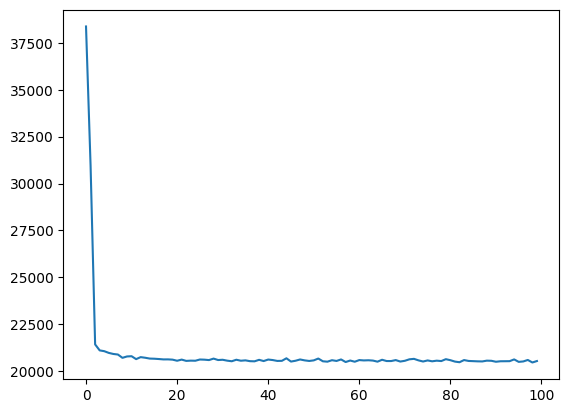

In [12]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

data = pd.read_csv("used_cars.csv")
tensor_data = tf.constant(data.values, dtype=tf.float32)
tensor_data=tf.random.shuffle(tensor_data)
X = tensor_data[:, :2]
Y = tensor_data[:, 2]
Y = tf.expand_dims(Y, axis=-1)

normalizer = tf.keras.layers.Normalization()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(2,)))
model.add(normalizer)
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='Adam', loss=tf.keras.losses.MeanAbsoluteError(), metrics=[tf.keras.metrics.MeanSquaredError()])
history=model.fit(X, Y, batch_size=32,validation_split= epochs=100, verbose=1)
print(history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()
model.summary()
test=tf.constant([[2021,1685]])
prediction=model.predict([test])
print(prediction)
model.save('Car_Price_model.keras')